In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression #This is a function to create a dataset

import pandas as pd 

%matplotlib inline 

np.random.seed(3)

1. Simple linear regression

1.1 Create a dataset

In [10]:
m =30 


X , Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1,m))
Y = Y.reshape((1,m))

Text(0, 0.5, 'y')

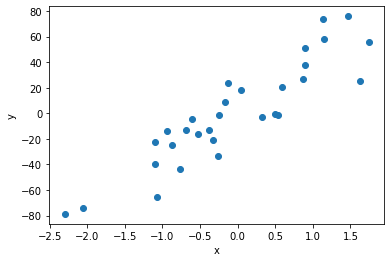

In [12]:
plt.scatter(x=X, y=Y)

plt.xlabel("x")
plt.ylabel("y")

In [13]:
print("The number of training examples is :-", X.shape[1])

The number of training examples is :- 30


2. Implementation of Neural network 

In [14]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return n_x, n_y

In [15]:
n_x , n_y = layer_sizes(X,Y)
print("Size of input layer :- ",n_x)
print("Size of output layer :-", n_y)

Size of input layer :-  1
Size of output layer :- 1


In [26]:
def initialize_parameters(n_x,n_y):
    #n_x is the size of the input layer 

    W = np.random.randn(n_y,n_x) * 0.01

    b = np.zeros((n_y,1))
    parameters = {"W":W, "b": b}

    return parameters


In [27]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00507489]]
b = [[0.]]


In [29]:
def forward_propagation(X, parameters):
    W = parameters.get("W")
    b = parameters.get("b")

    z = np.matmul(W,X) + b
    Y_hat = z


    return Y_hat

In [30]:
Y_hat = forward_propagation(X, parameters)
print(Y_hat)

[[-0.00161909  0.0054452  -0.00439185  0.00087505 -0.00580935 -0.0025501
   0.01168006  0.00346984  0.00194903  0.00445504  0.01045499  0.00558552
   0.00558183 -0.00575376 -0.00885473  0.00062365  0.00474893 -0.00824338
  -0.00742004 -0.00457548  0.00386304 -0.0026915   0.00268041  0.0013595
  -0.00295772 -0.00021423 -0.00457175  0.00126553  0.0031046   0.00163623]]


In [31]:
def compute_cost(Y_hat,Y):
    m = Y.shape[1]


    cost = (np.sum((Y_hat-Y)**2))/(2*m)


    return cost

In [32]:
print("Cost = ", compute_cost(Y_hat,Y))

Cost =  791.0537686687661


Muliple Linear Regression

In [33]:
df  = pd.read_csv("house_prices_train.csv")

In [38]:
X = df[['GrLivArea','OverallQual']]

Y = df['SalePrice']

In [47]:
X_norm = (X-np.mean(X))/np.std(X)

Y_norm = (Y-np.mean(Y))/np.std(Y)

print(Y_norm.shape[0])
print(len(Y_norm))

1460
1460


In [48]:
X_norm = np.array(X_norm).T

Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))


print ('The shape of X: ' + str(X_norm.shape))
print ('The shape of Y: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


In [52]:
M = np.array([
    [2,3],
    [2,1]
]) # This is the transformation matrix 

i = np.array([
    [1],
    [0]
])

j = np.array([
    [0],
    [1]
])


[[3]
 [1]]


/Applications/development/anaconda/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
<ipython-input-53-96e2140d7b4b>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1)])
<ipython-input-53-96e2140d7b4b>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

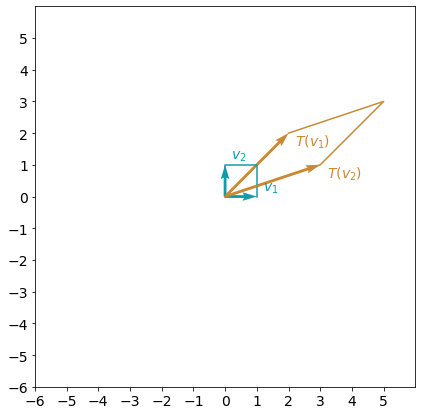

In [53]:
def plot_transformation(T,v1,v2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    
    plt.axis([-6, 6, -6, 6])
    plt.quiver([0, 0],[0, 0], [v1[0], v2[0]], [v1[1], v2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2[0],v1[0]+v2[0],v1[0]], 
        [0,v2[1],v1[1]+v2[1],v1[1]], 
        color=color_original)
    v1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1)])
    ax.text(v1[0]-0.2+v1_sgn[0], v1[1]-0.2+v1_sgn[1], f'$v_1$', fontsize=14, color=color_original)
    v2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2)])
    ax.text(v2[0]-0.2+v2_sgn[0], v2[1]-0.2+v2_sgn[1], f'$v_2$', fontsize=14, color=color_original)
    
    v1_transformed = T @ v1
    v2_transformed = T @ v2
    
    plt.quiver([0, 0],[0, 0], [v1_transformed[0], v2_transformed[0]], [v1_transformed[1], v2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2_transformed[0],v1_transformed[0]+v2_transformed[0],v1_transformed[0]], 
             [0,v2_transformed[1],v1_transformed[1]+v2_transformed[1],v1_transformed[1]], 
             color=color_transformed)
    v1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v1_transformed)])
    ax.text(v1_transformed[0]-0.2+v1_transformed_sgn[0], v1_transformed[1]-v1_transformed_sgn[1], 
            f'$T(v_1)$', fontsize=14, color=color_transformed)
    v2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v2_transformed)])
    ax.text(v2_transformed[0]-0.2+v2_transformed_sgn[0], v2_transformed[1]-v2_transformed_sgn[1], 
            f'$T(v_2)$', fontsize=14, color=color_transformed)
    
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(M, i , j)

In [57]:
M_eig = np.linalg.eig(M)

print(M_eig)

(array([ 4., -1.]), array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


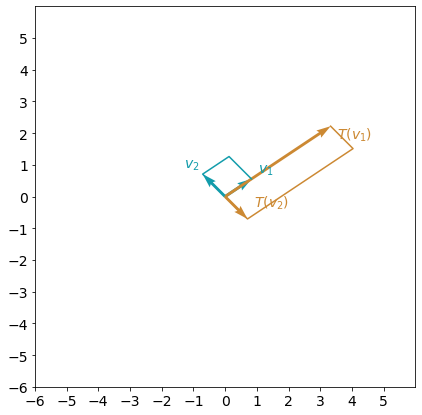

In [61]:
plot_transformation(M,M_eig[1][:,0],M_eig[1][:,1])

Reflection along y-axis

Eigen values -  [-1.  1.]
Eigen vectors -  (array([[1., 0.],
       [0., 1.]]),)


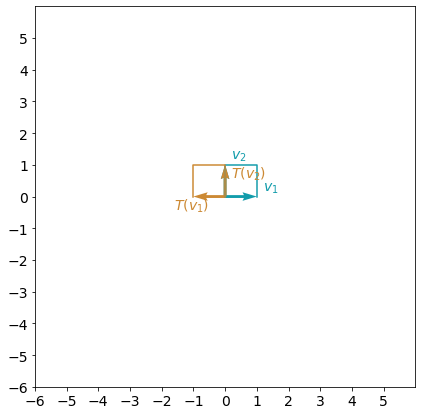

In [68]:
M = np.array([
    [-1,0],
    [0,1]
])

M_eig = np.linalg.eig(M)

print("Eigen values - ", M_eig[0])
print("Eigen vectors - ", M_eig[1:])

plot_transformation(M,M_eig[1][:,0], M_eig[1][:,1])

Shear in the X-direction

Eigen values -  [1. 1.]
Eigen vectors -  (array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]]),)


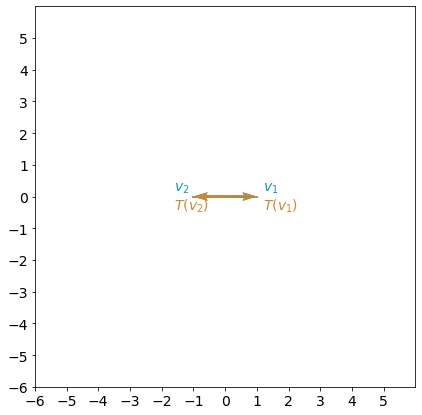

In [71]:
M = np.array([
    [1,0.5],
    [0,1]
])

M_eig = np.linalg.eig(M)

print("Eigen values - ", M_eig[0])
print("Eigen vectors - ", M_eig[1:])

plot_transformation(M,M_eig[1][:,0], M_eig[1][:,1])

Rotation

In [72]:
M = np.array([
    [0,1],
    [-1,0]
]) #This is after 90 degree rotation in clockwise direction 

M_eig = np.linalg.eig(M)

print("Eigen values - ", M_eig[0])
print("Eigen vectors - ", M_eig[1:])

Eigen values -  [0.+1.j 0.-1.j]
Eigen vectors -  (array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]),)


Case of identity matrix


In [73]:
M = np.array([
    [1,0],
    [0,1]
])

M_eig = np.linalg.eig(M)

print("Eigen values - ", M_eig[0])
print("Eigen vectors - ", M_eig[1:])

Eigen values -  [1. 1.]
Eigen vectors -  (array([[1., 0.],
       [0., 1.]]),)


In [76]:
P = np.array([    
    [0, 0.75, 0.35, 0.25, 0.85],
    [0.15, 0, 0.35, 0.25, 0.05],
    [0.15, 0.15, 0, 0.25, 0.05],
    [0.15, 0.05, 0.05, 0, 0.05],
    [0.55, 0.05, 0.25, 0.25, 0]
]) 

X0 = np.array([[0], [0], [0], [1], [0]])


X1 = np.matmul(P, X0)

print(sum(P))

[1. 1. 1. 1. 1.]


In [77]:
X = np.array([[0],[0],[0],[1],[0]])
m = 20

for t in range(m):
    X = P @ X
    
print(X)

[[0.39392366]
 [0.13392366]
 [0.11407667]
 [0.0850993 ]
 [0.27297672]]


In [78]:
np.linalg.eig(P)

(array([ 1.        , -0.70367062,  0.00539505, -0.08267227, -0.21905217]),
 array([[-0.76088562, -0.81362074,  0.10935376,  0.14270615, -0.39408574],
        [-0.25879453,  0.050269  , -0.6653158 ,  0.67528802, -0.66465044],
        [-0.2204546 ,  0.07869601, -0.29090665,  0.17007443,  0.35048734],
        [-0.1644783 ,  0.12446953,  0.19740707, -0.43678067,  0.23311487],
        [-0.52766004,  0.56018621,  0.64946163, -0.55128793,  0.47513398]]))